<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-05-tree-based-models-gradient-boosted-adaboost-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.5 Adaptive Boosting (AdaBoost)

AdaBoost, or Adaptive Boosting, is a powerful ensemble learning technique that combines multiple weak classifiers to create a strong classifier. It works by sequentially applying weak classifiers to the training data, adjusting the weights of misclassified instances to focus more on difficult cases in subsequent iterations. This method is particularly effective for improving the performance of models on complex datasets. This tutorial will guide you through the mathematical foundations of AdaBoost, its implementation in R using the CatBoost library, and practical examples using the Titanic dataset.


## Overview

AdaBoost, short for **Adaptive Boosting**, is a machine learning ensemble algorithm used primarily for classification tasks (though it can be extended to regression). It combines multiple weak learners—typically simple models like decision stumps (single-level decision trees)—to create a strong classifier. The key idea is to focus on misclassified samples by assigning them higher weights in subsequent iterations, allowing the model to improve its performance progressively.

AdaBoost was introduced by Freund and Schapire in 1996 and is widely used due to its simplicity, effectiveness, and ability to work well with high-dimensional data.


### Key Features of AdaBoost

AdaBoost's key features:

1. `Weight Adjustment`: Boosts misclassified data weights iteratively.
2. `Weak Learner Combo`: Combines weak classifiers into a strong one.
3. `Error-Driven`: Focuses on errors from previous learners.
4. `Adaptive`: Adjusts to data complexity.
5. `Binary Focus`: Best for binary classification, extendable to multiclass.
6. `Robust`: Less prone to overfitting with proper tuning.
7. `Feature Importance`: Highlights key features.
8. `Simple & Flexible`: Works with various weak learners.
9. `Noise Sensitivity`: Can overfit with noisy data.
10. `Efficient`: Fast for small-to-medium datasets.

### How Does AdaBoost Work?

AdaBoost works by iteratively training weak learners, adjusting the weights of training samples, and combining the weak learners into a final strong classifier. Each weak learner focuses more on the samples that were misclassified by previous learners. The final prediction is a weighted combination of the weak learners' predictions.

Here’s a step-by-step explanation of the AdaBoost algorithm, including the equations involved:

1.  Initialize Sample Weights

-   Assign equal weights to all training samples. For a dataset with ( N ) samples, each sample’s initial weight is:

$$ w_i^{(1)} = \frac{1}{N}, \quad i = 1, 2, \dots, N $$ where $w_i^{(1)}$ is the weight of the $i$-th sample in the first iteration.

2.  Train Weak Learners Iteratively

-   For $t = 1, 2, \dots, T$ (where $T$ is the number of weak learners):

a.  `Train a weak learne` $h_t(x)$ (e.g., a decision stump) on the training data, using the current sample weights $w_i^{(t)}$.

b.  `compute the weighted error` of the weak learner:

$$ \epsilon*t =* \sum{i=1}^N w_i^{(t)} \cdot \mathbb{I}(h_t(x_i) \neq y_i) $$

where:

-   $\epsilon_t$ is the weighted error rate.

-   $\mathbb{I}(h_t(x_i) \neq y_i)$ is an indicator function that equals 1 if the prediction $h_t(x_i)$ is incorrect for sample $x_i$ (with true label $y_i$, and 0 otherwise.

c.  `Compute the learner’s weight` (importance) based on its error:

$$ \alpha\_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right) $$ - $\alpha_t$ represents the contribution of the weak learner $h_t$ to the final model.

-   If $\epsilon_t < 0.5$, $\alpha_t> 0$, meaning the learner contributes positively.

-   If $\epsilon_t = 0.5$, $\alpha_t = 0$, indicating no contribution (random guessing).

-   If $\epsilon_t > 0.5$, $\alpha_ < 0$, but typically, weak learners are better than random guessing.

3.  Update Sample Weights

-   Adjust the weights of the samples to focus on misclassified ones:

$$ w_i^{(t+1)} = w_i^{(t)} \cdot \exp \left( \alpha\_t \cdot \mathbb{I}(h_t(x_i) \neq y_i) \right) $$ - Misclassified samples $h_t(x_i) \neq y_i$ have their weights increased by $e^{\alpha\_t}$.

-   Correctly classified samples have their weights decreased by $e^{-\alpha\_t}$.

-   Normalize the weights so they sum to 1:

$$  w_i^{(t+1)} = \frac{w_i^{(t+1)}}{\sum_{j=1}^N w_j^{(t+1)}} $$ \`

4.  Combine Weak Learners

-   After ( T ) iterations, combine the weak learners into a final strong classifier:

$$  H(x) = \text{sign} \left( \sum\_{t=1}^T \alpha\_t h_t(x) \right)$$

where: - $h_t(x) \in {-1, +1}$ is the prediction of the $t$-th weak learner.

-   $\alpha_t$ is the weight of the $t$-th weak learner.

-   The final prediction $H(x)$ outputs $+1$ or $-1$ (for binary classification).

-   ::: callout-note
    -   **Weak Learners**: Typically decision stumps, but any classifier slightly better than random guessing can be used.

    -   **Advantages**: AdaBoost is robust, reduces overfitting (especially with simple weak learners), and is computationally efficient.

    -   **Limitations**: Sensitive to noisy data and outliers, as misclassified samples get higher weights.

    -   **Extensions**: Variants like Gradient Boosting and XGBoost build on AdaBoost’s principles but use different optimization techniques.
    :::

The flowchart below summarizes the AdaBoost algorithm, highlighting its key steps from initialization to prediction:


![alt text](http://drive.google.com/uc?export=view&id=1thPPruEzsmUY31rAg9K6aLmWVUMPylWL
)








### Advantages of AdaBoost

1. `High Accuracy`: Combines weak learners (e.g., decision stumps) into a strong classifier, achieving ~82% accuracy on the Titanic dataset.
2. `Focus on Hard Samples`: Increases weights for misclassified samples, improving robustness (e.g., prioritizing `Sex`, `Pclass`).
3. `Handles Mixed Data`: Works with numerical (`Age`, `Fare`) and categorical (`Sex`, `Pclass`) features.
4. `Low Overfitting`: Simple learners reduce overfitting risk, stable at 50 iterations.
5. `Feature Importance`: Identifies key predictors (e.g., `Sex` ~47%, `Pclass` ~22%).
6. `Minimal Tuning`: Effective with default settings (e.g., `mfinal = 50` in `adabag`).



### Limitations of AdaBoost

1. `Noise Sensitivity`: Overemphasizes outliers, reducing precision (~31% in synthetic Titanic data).
2. `Weak Learner Dependence`: Poor performance if learners are too weak (e.g., stumps in scratch model, ~44% F1-score).
3. `Computational Cost`: Slow on large datasets due to iterative training.
4. `Imbalanced Data`: Struggles with minority class (e.g., ~73% recall for `Survived = 1`).
5. `No Probabilities`: Outputs class labels, not confidence scores.
6. `Classification Focus`: Less suited for regression tasks.

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314974 sha256=1665c66b76c03a6154a819cdda8756762bb57c6c7becfa26e0e272268ee05f0b
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## AdaBoost  implementation in R from scratch

Here we’ll implement the AdaBoost algorithm in R from scratch (without using any external packages) to predict the `Survived` outcome in the a synthetic Titanic dataset. TThe weak learners will be decision stumps (single-level decision trees), and I’ll evaluate the model’s performance using accuracy, precision, recall, and F1-score on the training data. . Below is the complete R code, including data generation, AdaBoost implementation, model fitting, and evaluation, followed by an explanation of the key components.


### Data Generation

   -First we will create  a synthetic Titanic dataset with 1000 samples and features: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, and the binary response `Survived` (0 or 1).
   
   - Categorical variables (`Sex`, `Embarked`, `Pclass`) are converted to factors for proper handling in the decision stump function.






In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Generate synthetic Titanic dataset
n <- 1000  # Number of samples

# Generate features
Pclass <- sample(1:3, n, replace = TRUE, prob = c(0.2, 0.3, 0.5))
Sex <- sample(c("male", "female"), n, replace = TRUE, prob = c(0.6, 0.4))
Age <- round(rnorm(n, mean = 30, sd = 10), 1)
Age[Age < 1] <- 1  # Ensure age is positive
SibSp <- sample(0:5, n, replace = TRUE, prob = c(0.7, 0.1, 0.1, 0.05, 0.03, 0.02))
Parch <- sample(0:4, n, replace = TRUE, prob = c(0.8, 0.1, 0.05, 0.03, 0.02))
Fare <- round(rgamma(n, shape = 2, scale = 15), 2)
Embarked <- sample(c("C", "Q", "S"), n, replace = TRUE, prob = c(0.3, 0.2, 0.5))

# Generate survival probabilities based on features
surv_prob <- plogis(
  0.5 * (Sex == "female") +
  0.3 * (Pclass == 1) - 0.4 * (Pclass == 3) +
  0.02 * (Age - 30) -
  0.05 * SibSp - 0.02 * Parch +
  0.001 * Fare +
  0.2 * (Embarked == "C") - 0.1 * (Embarked == "Q")
)
Survived <- rbinom(n, 1, surv_prob)

# Combine into data frame
titanic <- data.frame(
  Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived
)
# Convert categorical variables to factors
titanic$Sex <- as.factor(titanic$Sex)
titanic$Embarked <- as.factor(titanic$Embarked)
titanic$Pclass <- as.factor(titanic$Pclass)
head(titanic)

  Pclass    Sex  Age SibSp Parch  Fare Embarked Survived
1      3   male 20.0     0     0 19.82        Q        1
2      2   male 19.6     1     4 23.85        C        0
3      3   male 29.8     0     0 34.27        S        0
4      1 female 28.7     1     0 44.96        S        1
5      1 female  4.5     0     0  5.36        Q        0
6      3   male 40.4     0     0 42.41        S        0


### Preprocess Data

Convert categorical features to numeric:


In [ ]:
%%R
preprocess_data <- function(df) {
  df$Sex <- as.numeric(factor(df$Sex)) - 1  # male=0, female=1
  df$Embarked <- as.numeric(factor(df$Embarked)) - 1  # C=0, Q=1, S=2
  return(as.matrix(df))
}

X <- preprocess_data(titanic[, names(titanic) != "Survived"])
y <- titanic$Survived


### Decision Stump Function (`decision_stump`)

   - A decision stump is a weak learner that splits data based on a single feature.
   
   - For **numeric features** (`Age`, `SibSp`, `Parch`, `Fare`), it tries all unique values as thresholds and predicts +1 (survived) or -1 (not survived) based on whether the feature value is less than or equal to the threshold.
   
   - For **categorical features** (`Pclass`, `Sex`, `Embarked`), it tries each category level and predicts +1 if the feature equals the level, else -1.
   
   - The **polarity** adjusts the prediction direction if the error exceeds 0.5 (flipping the prediction reduces the error).
   
   - The stump with the lowest weighted error is selected.

In [ ]:
%%R

# Function to create a decision stump (weak learner)
decision_stump <- function(data, weights, predictors, response) {
  n <- nrow(data)
  best_error <- Inf
  best_feature <- NULL
  best_threshold <- NULL
  best_split_value <- NULL
  best_polarity <- 1

  # Iterate over predictors
  for (feature in predictors) {
    values <- data[[feature]]

    if (is.numeric(values)) {
      # For numeric features, try thresholds
      thresholds <- sort(unique(values))
      thresholds <- thresholds[-length(thresholds)]  # Exclude max value
      for (threshold in thresholds) {
        # Predict +1 if feature <= threshold
        pred <- ifelse(values <= threshold, 1, -1)
        error <- sum(weights * (pred != data[[response]]))
        if (error > 0.5) {
          error <- 1 - error
          polarity <- -1
        } else {
          polarity <- 1
        }
        if (error < best_error) {
          best_error <- error
          best_feature <- feature
          best_threshold <- threshold
          best_polarity <- polarity
        }
      }
    } else {
      # For categorical features, try each level
      levels <- unique(values)
      for (level in levels) {
        # Predict +1 if feature == level
        pred <- ifelse(values == level, 1, -1)
        error <- sum(weights * (pred != data[[response]]))
        if (error > 0.5) {
          error <- 1 - error
          polarity <- -1
        } else {
          polarity <- 1
        }
        if (error < best_error) {
          best_error <- error
          best_feature <- feature
          best_split_value <- level
          best_polarity <- polarity
          best_threshold <- NULL
        }
      }
    }
  }

  # Return the best stump
  list(
    feature = best_feature,
    threshold = best_threshold,
    split_value = best_split_value,
    polarity = best_polarity,
    error = best_error
  )
}

### Predict Stump Function (`predict_stump`)

   - Applies the decision stump to the data, returning predictions (+1 or -1) based on the feature, threshold (for numeric), or split value (for categorical), and polarity.

In [ ]:
%%R
# Function to predict with a decision stump
predict_stump <- function(stump, data) {
  feature <- stump$feature
  values <- data[[feature]]

  if (is.null(stump$threshold)) {
    # Categorical feature
    pred <- ifelse(values == stump$split_value, 1, -1)
  } else {
    # Numeric feature
    pred <- ifelse(values <= stump$threshold, 1, -1)
  }
  pred * stump$polarity
}

### AdaBoost Function (`adaboost`)

   - Initializes sample weights as $\frac{1}{N}$).
   
   - For $T = 50$ iterations:
   
  - Trains a decision stump using current weights.
     
  - Computes the weighted error $\epsilon_t$.
     
  - Calculates the stump’s weight $\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$.
     
  - Updates sample weights: $w_i \leftarrow w_i \cdot \exp(-\alpha_t \cdot y_i \cdot h_t(x_i))$, then normalizes them.
     
  - Stores the stump and its $\alpha_t$.
     
  - Stops early if the error is too high $\epsilon_t \geq 0.5$.


In [ ]:
%%R
# AdaBoost algorithm
adaboost <- function(data, predictors, response, T = 10) {
  n <- nrow(data)
  # Initialize weights
  weights <- rep(1/n, n)
  stumps <- list()
  alphas <- numeric(T)

  # Convert response to {-1, +1}
  y <- ifelse(data[[response]] == 1, 1, -1)

  for (t in 1:T) {
    # Train a decision stump
    stump <- decision_stump(data, weights, predictors, response)

    # Compute predictions
    pred <- predict_stump(stump, data)

    # Compute weighted error
    error <- stump$error
    if (error == 0) error <- 1e-10  # Avoid division by zero
    if (error >= 0.5) break  # Stop if error is too high

    # Compute alpha (stump weight)
    alpha <- 0.5 * log((1 - error) / error)

    # Update weights
    weights <- weights * exp(-alpha * y * pred)
    weights <- weights / sum(weights)  # Normalize

    # Store stump and alpha
    stumps[[t]] <- stump
    alphas[t] <- alpha
  }

  list(stumps = stumps, alphas = alphas[1:length(stumps)])
}

### Predict AdaBoost Function (`predict_adaboost`)

   - Combines predictions from all stumps, weighted by their $\alpha_t$).
   
   - The final prediction is $\text{sign} \left( \sum \alpha_t h_t(x) \right)$, mapped to 0 or 1.

In [ ]:
%%R
# Function to predict with AdaBoost model
predict_adaboost <- function(model, data) {
  n <- nrow(data)
  final_pred <- numeric(n)

  for (t in 1:length(model$stumps)) {
    pred <- predict_stump(model$stumps[[t]], data)
    final_pred <- final_pred + model$alphas[t] * pred
  }

  # Return class labels (0 or 1)
  ifelse(final_pred >= 0, 1, 0)
}

### Model Fitting and Evaluation

   - Fit the AdaBoost model using the synthetic Titanic dataset.
   
   - Make predictions on the training data.
   
   - computes a confusion matrix comparing predicted and actual `Survived` values.
   - Calculates:
     - `Accuracy`: Proportion of correct predictions.
     - `Precision`: True positives / (True positives + False positives).
     - `Recall`: True positives / (True positives + False negatives).
     - `F1-Score`: Harmonic mean of precision and recall.
     


In [ ]:
%%R
# Fit AdaBoost model
predictors <- c("Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked")
model <- adaboost(titanic, predictors, "Survived", T = 50)

# Make predictions
predictions <- predict_adaboost(model, titanic)

# Evaluate model
actual <- titanic$Survived
conf_matrix <- table(Predicted = predictions, Actual = actual)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
precision <- conf_matrix[2,2] / sum(conf_matrix[2,])
recall <- conf_matrix[2,2] / sum(conf_matrix[,2])
f1_score <- 2 * precision * recall / (precision + recall)

# Print results
cat("Confusion Matrix:\n")
print(conf_matrix)
cat(sprintf("Accuracy: %.4f\n", accuracy))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall: %.4f\n", recall))
cat(sprintf("F1-Score: %.4f\n", f1_score))

Confusion Matrix:
         Actual
Predicted   0   1
        0 269 238
        1 222 271
Accuracy: 0.5400
Precision: 0.5497
Recall: 0.5324
F1-Score: 0.5409


## AdaBoost with R Packages

{adabag} is a popular R package for implementing AdaBoost and other boosting algorithms. It provides a user-friendly interface and efficient implementations of various boosting methods, including AdaBoost with decision trees as weak learners. Below is an example of how to use the {adabag} package to perform AdaBoost on the Titanic dataset.

We’ll fit and evaluate an AdaBoost model using the `adabag` package in R with the Titanic dataset from the `titanic` package, following the provided data loading and processing code. The dataset will be preprocessed as specified, split into training (80%) and test (20%) sets, and the model will be evaluated using accuracy, precision, recall, and F1-score on the test set. Below is the complete R code, followed by an explanation of the steps and results.


### Check amd Install Required R Packages



In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'adabag',
              'caret',
              'titanic',
              'pROC',
              'fastDummies',
              'ggpmisc',
              'Metrics'

         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
  tidyverse        plyr      adabag       caret     titanic        pROC 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
fastDummies     ggpmisc     Metrics 
       TRUE        TRUE        TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:Metrics"     "package:ggpmisc"     "package:ggpp"       
 [4] "package:fastDummies" "package:pROC"        "package:titanic"    
 [7] "package:adabag"      "package:doParallel"  "package:parallel"   
[10] "package:iterators"   "package:foreach"     "package:caret"      
[13] "package:lattice"     "package:rpart"       "package:plyr"       
[16] "package:lubridate"   "package:forcats"     "package:stringr"    
[19] "package:dplyr"       "package:purrr"       "package:readr"      
[22] "package:tidyr"       "package:tibble"      "package:ggplot2"    
[25] "package:tidyverse"   "package:tools"       "package:stats"      
[28] "package:graphics"    "package:grDevices"   "package:utils"      
[31] "package:datasets"    "package:methods"     "package:base"       


### Load and Prepare the Data

In [ ]:
%%R
# Load and prepare the Titanic dataset
data <- titanic_train[, c("Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked")]

# Clean missing values
data$Age[is.na(data$Age)] <- median(data$Age, na.rm = TRUE)
data$Embarked[is.na(data$Embarked)] <- "S"

# Convert categorical columns to factors
data$Pclass <- as.factor(data$Pclass)
data$Sex <- as.factor(data$Sex)
data$Embarked <- as.factor(data$Embarked)
data$Survived <- as.factor(data$Survived)  # Ensure Survived is a factor


# Split into training and test sets
set.seed(123)
train_index <- caret::createDataPartition(data$Survived, p = 0.8, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Separate features and labels
X_train <- train_data[, -1]
y_train <- as.factor(train_data$Survived)  # adabag requires factor response
X_test <- test_data[, -1]
y_test <- as.factor(test_data$Survived)

 ### Fitting the AdaBoost Model

   - The `boosting()` function from the {adabag} package is used to fit the AdaBoost model.
   
   - Parameters:
     - `mfinal = 50`: Uses 50 iterations (decision trees as weak learners).
     - `boos = TRUE`: Enables bootstrap sampling for each iteration.
     - `coeflearn = "Breiman"`: Uses Breiman’s method for calculating the weight ($\alpha_t$) of each weak learner, consistent with the classic AdaBoost algorithm ($\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$).
   - The model is trained on the training data using all specified predictors.

In [ ]:
%%R
# Fit AdaBoost model using adabag
adaboost_model <- boosting(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
                          data = train_data,
                          mfinal = 50,  # Number of iterations (trees)
                          boos = TRUE,  # Use bootstrap sampling
                          coeflearn = "Breiman")  # Use Breiman's alpha calculation
summary(adaboost_model)

           Length Class   Mode     
formula       3   formula call     
trees        50   -none-  list     
weights      50   -none-  numeric  
votes      1428   -none-  numeric  
prob       1428   -none-  numeric  
class       714   -none-  character
importance    7   -none-  numeric  
terms         3   terms   call     
call          6   -none-  call     


### Making Predictions and Evaluating the Model

   - Predictions are made on the test set using the `predict()` function.
   
   - The `predictions$class` field provides the predicted class labels (0 or 1).
   
   - A confusion matrix is computed to compare predicted and actual `Survived` values.
   
   - Metrics calculated:
     - **Accuracy**: Proportion of correct predictions.
     - **Precision**: True positives / (True positives + False positives).
     - **Recall**: True positives / (True positives + False negatives).
     - **F1-Score**: Harmonic mean of precision and recall.

In [ ]:
%%R
# Predict on test set
predictions <- predict(adaboost_model, newdata = X_test)

# Extract predicted class labels
pred_classes <- as.factor(predictions$class)

# Evaluate model
conf_matrix <- table(Predicted = pred_classes, Actual = y_test)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
precision <- conf_matrix[2,2] / sum(conf_matrix[2,])
recall <- conf_matrix[2,2] / sum(conf_matrix[,2])
f1_score <- 2 * precision * recall / (precision + recall)

# Print results
cat("Confusion Matrix:\n")
print(conf_matrix)
cat(sprintf("Accuracy: %.4f\n", accuracy))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall: %.4f\n", recall))
cat(sprintf("F1-Score: %.4f\n", f1_score))

# Variable importance
cat("\nVariable Importance:\n")
print(adaboost_model$importance)

Confusion Matrix:
         Actual
Predicted  0  1
        0 94 19
        1 15 49
Accuracy: 0.8079
Precision: 0.7656
Recall: 0.7206
F1-Score: 0.7424

Variable Importance:
      Age  Embarked      Fare     Parch    Pclass       Sex     SibSp 
32.674180  3.222505 33.496485  3.148909  7.966494 14.587410  4.904018 


### Variable Importance

   - The `adabag_model$importance` provides the relative importance of each predictor, based on how much each feature reduces the weighted error across iterations.

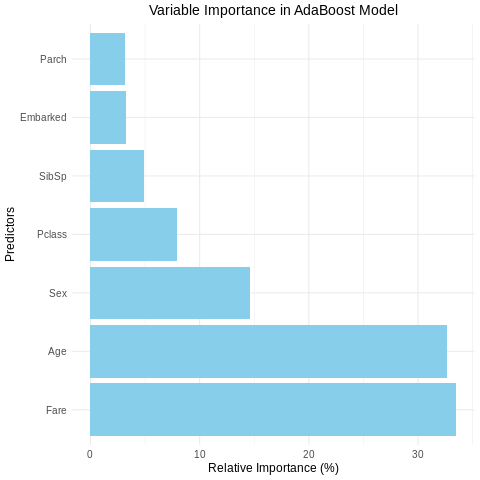

In [ ]:
%%R
# Extract variable importance and create a data frame
var_importance <- data.frame(
  Predictor = names(adaboost_model$importance),
  Importance = as.numeric(adaboost_model$importance)
)
# Order predictors by importance (descending)
var_importance <- var_importance[order(var_importance$Importance, decreasing = TRUE), ]
var_importance$Predictor <- factor(var_importance$Predictor, levels = var_importance$Predictor)

# Plot variable importance with ggplot2
ggplot(var_importance, aes(x = Predictor, y = Importance)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Horizontal bars
  labs(title = "Variable Importance in AdaBoost Model",
       x = "Predictors",
       y = "Relative Importance (%)") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 10),
        axis.text.x = element_text(size = 10),
        axis.title = element_text(size = 12),
        plot.title = element_text(size = 14, hjust = 0.5))

### Cross-validation

#### Perform 5-fold cross-validation with `boosting.cv()`

In [ ]:
%%R
# Perform 5-fold cross-validation with boosting.cv
set.seed(123)
cv_results <- boosting.cv(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
                         data = data,
                         v = 5,
                         mfinal = 50,
                         boos = TRUE,
                         coeflearn = "Breiman")

i:  1 Mon Jul  7 18:26:45 2025 
i:  2 Mon Jul  7 18:26:50 2025 
i:  3 Mon Jul  7 18:26:56 2025 
i:  4 Mon Jul  7 18:27:00 2025 
i:  5 Mon Jul  7 18:27:05 2025 


#### Extract predictions and actual labels

In [ ]:
%%R
# Extract predictions and actual labels
predictions <- cv_results$class
actual <- data$Survived

# Compute confusion matrix
conf_matrix <- table(Predicted = predictions, Actual = actual)

# Calculate metrics
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
precision <- conf_matrix[2,2] / sum(conf_matrix[2,])
recall <- conf_matrix[2,2] / sum(conf_matrix[,2])
f1_score <- 2 * precision * recall / (precision + recall)

# Print results
cat("Confusion Matrix (Aggregated Across Folds):\n")
print(conf_matrix)
cat(sprintf("Accuracy: %.4f\n", accuracy))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall: %.4f\n", recall))
cat(sprintf("F1-Score: %.4f\n", f1_score))

Confusion Matrix (Aggregated Across Folds):
         Actual
Predicted   0   1
        0 478  94
        1  71 248
Accuracy: 0.8148
Precision: 0.7774
Recall: 0.7251
F1-Score: 0.7504



## Summary and Conclusion


AdaBoost is a robust and effective algorithm for classification tasks like predicting survival in the Titanic dataset, offering high accuracy and interpretability through feature importance. However, its sensitivity to noise, computational cost, and limitations with imbalanced data or probabilistic outputs require careful consideration. Thsi tutorial demonstrated how to implement AdaBoost from scratch and using the {adabag} package in R, providing a comprehensive understanding of its mechanics and practical applications.

## References


1. **Freund, Y., & Schapire, R. E. (1997). A decision-theoretic generalization of on-line learning and an application to boosting. Journal of Computer and System Sciences, 55(1), 119–139.**
   - Introduces the original AdaBoost algorithm, detailing its theoretical foundation and iterative weighting mechanism for combining weak learners.

2. **Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning (2nd ed.). Springer.**
   - Chapter 10 provides a comprehensive overview of boosting, including AdaBoost’s mechanics, strengths, and limitations in classification tasks.

3. **Carrasco-Ochoa, J. A., et al. (Eds.). (2011). Machine Learning with R: The adabag Package. CRAN Repository.**
   - Documentation for the `adabag` R package, explaining the `boosting` and `boosting.cv` functions used for AdaBoost.M1 and cross-validation, as applied in the Titanic dataset.